In [1]:
import numpy as np

Умеем делать прямой проход по нейронной сети, пора учиться делать обратный, чтобы она хоть чему-то училась.

![](https://i0.wp.com/analyticsarora.com/wp-content/uploads/2021/09/Understand-The-Backpropagation-Algorithm-Interview-Question.png?resize=800%2C600&ssl=1)

## Сначала закодим прямой проход по сети, и обернем это все в класс

#### Но до этого необходимо описать слои в виде класса

# Задача 1. Реализовать линейный слой

In [2]:
class LinearLayer():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size)
        self.params = [self.W]
        self.gradW = None
        self.gradInput = None
        
    def forward(self, X):
        self.X = X.copy()
        output = X.dot(self.W)
        return output

In [3]:
np.random.seed(17)

X = np.random.random(size=(10000, 5))
linear = LinearLayer(5, 3)
output = linear.forward(X)
correct_answer = np.array([[-0.75476927,  0.39598163, -0.11428765],
                           [ 1.28828674, -0.90586033,  0.67063637],
                           [ 2.51515422, -0.95305043,  1.4073423 ]])
assert np.isclose(output[:3], correct_answer).all()

# Задача 2. Реализовать ReLU-активацию слоя 

![ReLU Image](https://pytorch.org/docs/stable/_images/ReLU.png)

In [4]:
class ReLULayer():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.X = X.copy()
        output = np.maximum(X, 0)
        return output

In [5]:
np.random.seed(17)

X = np.random.random(size=(10000, 5))
linear = LinearLayer(5, 3)
output = linear.forward(X)
output_relu = ReLULayer().forward(output)
correct_answer = np.array([[0,  0.39598163, 0],
                           [1.28828674, 0,  0.67063637],
                           [2.51515422, 0,  1.4073423 ]])
assert np.isclose(output_relu[:3], correct_answer).all()

# Задача 3. Реализовать функцию потерь

Для бинарной классификации Binary Cross Entropy Loss:
$$
H(\hat{y}, y) = - \frac{1}{N} \sum_{j}^N y^j\cdot log(\hat{y}^j) + (1 - y^j) \cdot log(1 - \hat{y}^j)
$$
$\hat{y}^j$ - предсказанное значение класса  
$y^j$ - истинное значение класса  
$N$ - количество наблюдений  
  
   
Для задач классификации используется Cross Entropy Loss:
$$
H(\hat{y}, y) = - \frac{1}{N} \sum_{j}^N \sum_{i}^M{y_i^j\cdot log(\hat{y}_i^j)}
$$
$\hat{y}_i^j$ - предсказанное значение класса i для наблюдения j   
$y_i^j$ - истинное значение класса i для наблюдения j  
$N$ - количество наблюдений   
$M$ - количество предсказанных классов

In [6]:
class BinaryCrossEntropyLoss():
    def forward(self, y_true, y_pred):
        n = len(y_true)
        loss = - (1 / n) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

In [7]:
np.random.seed(17)

bceloss = BinaryCrossEntropyLoss()

y_true = np.array([1, 1, 0, 0])
y_pred = np.array([0.5] * 4)
assert round(bceloss.forward(y_true, y_pred), 3) == 0.693

y_true = np.random.randint(0, 2, size=(100))
y_pred = np.random.random(100)
assert round(bceloss.forward(y_true, y_pred), 3) == 0.997

https://forms.gle/rP4RJ5ZJ1fyjkeJE8

# Задача 3.5 Поупражняться в обратном распространении ошибки на графах

Пример 1:
$$
f(x, y, z) = (x + y) * z
$$

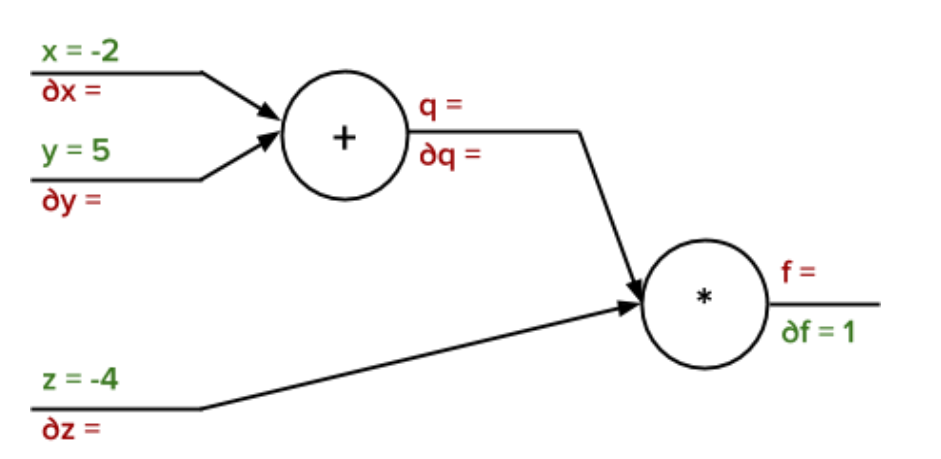

Пример 2:
$$
z = w_0 x_0 + w_1 x_1 + w_2
$$
$$
y = \sigma(z) = \frac {1}{1 + e^{-z}}
$$

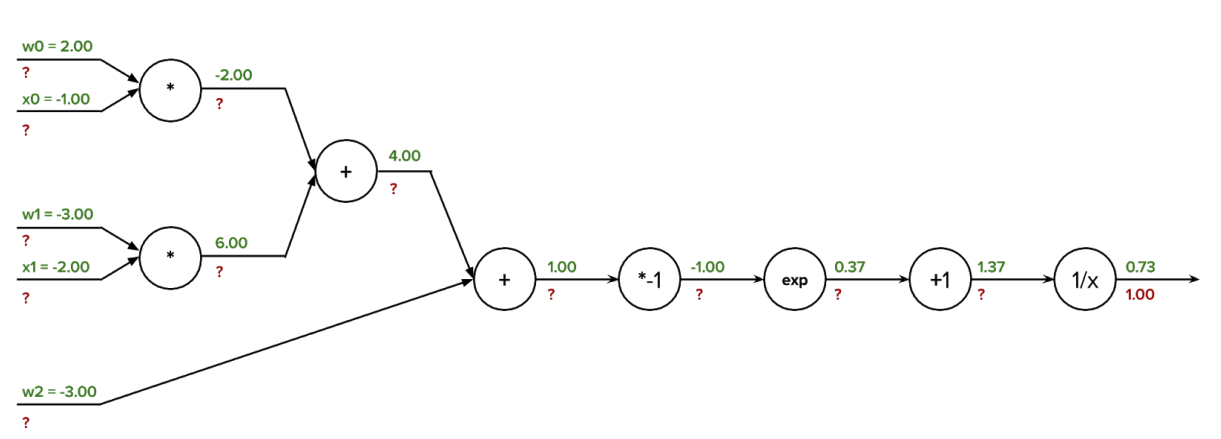

# 3.5 Ответы

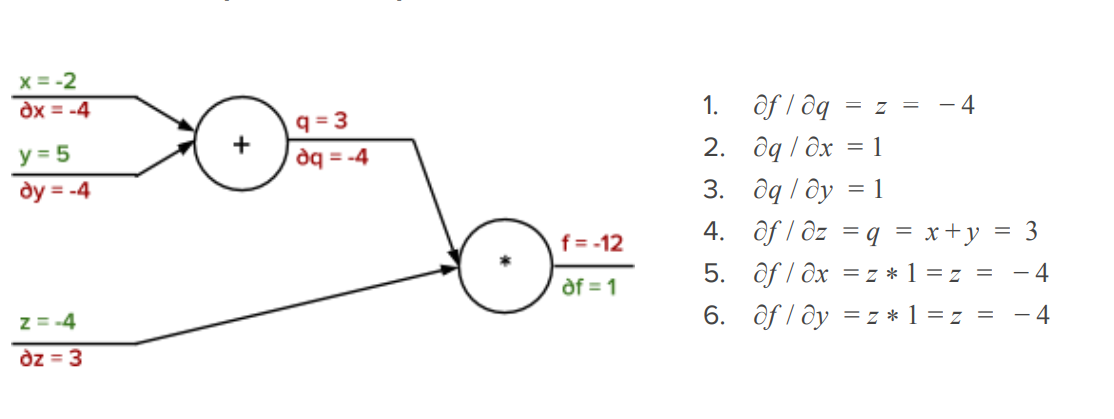

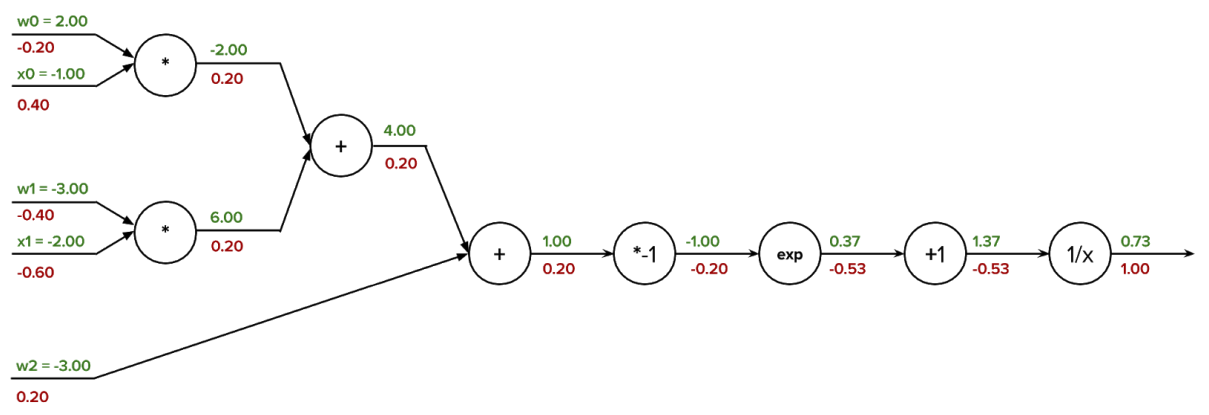

# Задача 4\*. Реализовать обратный проход по линейному слою

Здесь начинаем работать с градиентами.  
1. Зачем вообще градиент?  
2. Причем здесь веса?  
3. Почему не можем менять изначальные данные?  

In [8]:
class LinearLayerWithBackprop(LinearLayer):
    def backward(self, dout):
        self.gradW = self.X.T.dot(dout)
        self.gradInput = dout.dot(self.W.T)
        return self.gradInput, [self.gradW]

In [10]:
np.random.seed(17)

# initialization
linear_backprop = LinearLayerWithBackprop(5, 3)
X = np.random.randn(10000, 5)

# forward pass
linear_output = linear_backprop.forward(X)

# backpropagation
dout = np.random.randn(10000, 3)
dX, dW = linear_backprop.backward(dout)

assert dX.shape == X.shape
assert dW[0].shape == linear_backprop.W.shape
assert round(dX.sum(), 3) == 647.044
assert round(dW[0].sum(), 3) == 397.748

# Задача 5\*. Реализовать обратный проход по ReLU слою

In [11]:
class ReLULayerWithBackprop(ReLULayer):   
    def backward(self, dout):
        self.gradInput = dout.copy()
        self.gradInput[self.X <= 0] = 0
        return self.gradInput, []

In [13]:
np.random.seed(17)

# initialization
relu_backprop = ReLULayerWithBackprop()
X = np.random.randn(10000, 5)

# forward pass
relu_output = relu_backprop.forward(X)

# backpropagation
dout = np.random.randn(10000, 5)
dX, _ = relu_backprop.backward(dout)

assert dX.shape == X.shape
assert round(dX.sum(), 3) == 170.764

# Задача 6\*. Реализовать обратный проход по BCELoss

In [15]:
class BinaryCrossEntropyLossWithBackprop(BinaryCrossEntropyLoss):
    def backward(self, y_true, y_pred):
        m = len(y_true)
        loss = (1 / m) * (-(y_true / y_pred) + ((1 - y_true) / (1 - y_pred)))
        return loss

In [17]:
y_true = np.array([1, 1, 1, 0, 0])
y_pred = np.array([0.99, 0.9, 0.8, 0.5, 0.2])
bceloss_backward = BinaryCrossEntropyLossWithBackprop()

right_answer = np.array([-0.2020202, -0.22222222, -0.25, 0.4, 0.25])
assert np.isclose(bceloss_backward.backward(y_true, y_pred), right_answer).all()